### Задача 1.1

Импорт необходимых библиотек

In [11]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import numpy as np

Определение системы

In [12]:
def odes(t,y,f_a):
    I, N = y
    dydt = [(N-1)*I,
            eta_g*(J+delta_a*np.sin(2*np.pi*f_a*t)-N*(1+I))        
    ]
    return dydt

Параметры

In [3]:
tau_p=20*10**(-12)
tau_c=1*10**(-9)
eta_g=tau_p/tau_c
J=4
delta_a=0.1*J

В первой лабораторной работе значение частоты определено как $f_{ro}=1.923\text{ ГГц}$. Для перехода к нормированным единицам домножим на время жизни фотона в резонаторе:

In [4]:
f=1.923*10**9*tau_p
f_array=np.arange(0.05*f,1.25*f, (1.25*f-0.05*f)/20)

Получен массив из 20 значений для дальнейшего расчета. Для определения временного промежутка найдем величину $\frac{20}{f_A}$ (подобрана, так как $\frac{10}{f_A}$ демонстрирует некорректную зависимость):

In [5]:
t_range=20/f
t_range

520.0208008320333

В соответствии с первой лабораторной и рассчитанной величиной вводим начальные значения и вектор времени:

In [6]:
y0=(J-1,1)
t=np.linspace(0,int(t_range),int(t_range)*10)

Интегрирование системы с определением минимальных и максимальных значений интенсивности

In [7]:
I_min=np.empty(20)
I_max=np.empty(20)
for i in range(len(f_array)):
    solution_ivp=solve_ivp(odes,t_span=[0,max(t)], t_eval=t, y0=y0, args=(f_array[i],), rtol=1e-8)
    #print(i)
    #print(solution_ivp.y[0])
    #print(max(solution_ivp.y[0]))
    #print(min(solution_ivp.y[0]))
    I_min[i]=min(solution_ivp.y[0])
    I_max[i]=max(solution_ivp.y[0])

Переход к частотам в ГГц

In [8]:
f_axis=f_array/(tau_p*10**9)

In [9]:
print(f_axis)
print(I_min)
print(I_max)

[0.09615 0.21153 0.32691 0.44229 0.55767 0.67305 0.78843 0.90381 1.01919
 1.13457 1.24995 1.36533 1.48071 1.59609 1.71147 1.82685 1.94223 2.05761
 2.17299 2.28837]
[2.59892856 2.59472788 2.58692455 2.57285207 2.55869365 2.52571038
 2.51005047 2.48113687 2.45870806 2.3865594  2.32602085 2.2823522
 2.21892973 2.11731005 2.02214666 1.9359621  1.93391596 2.02764377
 2.14175897 2.23453593]
[3.40073026 3.40393872 3.41706227 3.42054265 3.47633628 3.51816331
 3.54782373 3.56731394 3.58036087 3.65467442 3.75934371 3.89113927
 3.99762665 4.11496524 4.2641954  4.39470412 4.38375887 4.21958248
 4.04578617 3.88773524]


График

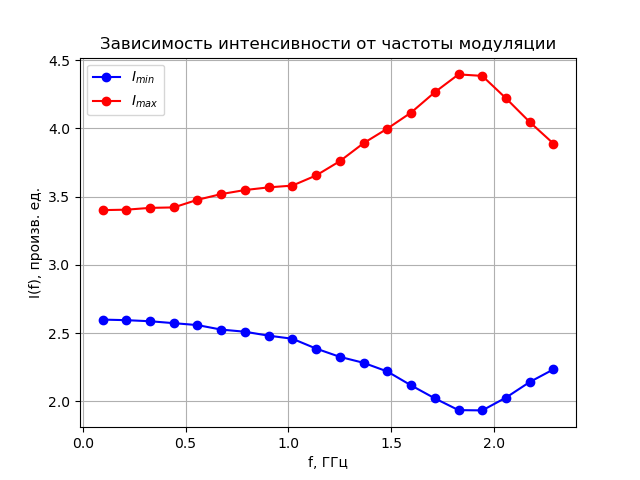

In [10]:
%matplotlib widget
plt.figure(1)
plt.title('Зависимость интенсивности от частоты модуляции')
plt.xlabel('f, ГГц')
plt.ylabel('I(f), произв. ед.') 
plt.plot(f_axis, I_min, color='blue', label='$I_{min}$', marker='o')
plt.plot(f_axis, I_max, color='red', label='$I_{max}$', marker='o')
plt.legend(loc='best')
plt.grid()
plt.savefig('graph1FINAL.png',dpi=600)
plt.show()